# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
# Ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [4]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


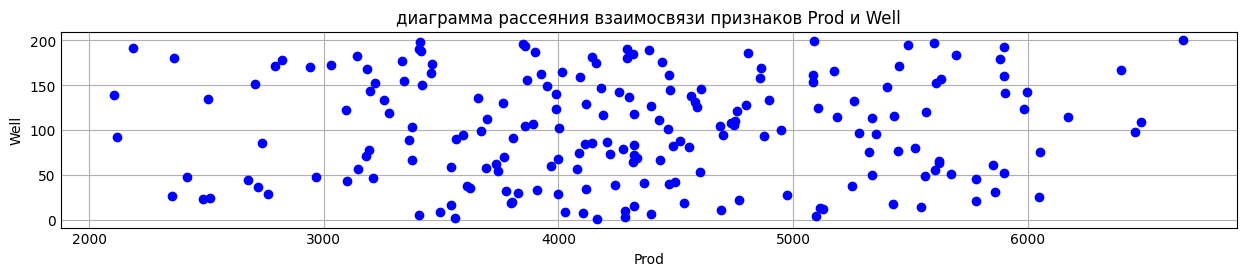

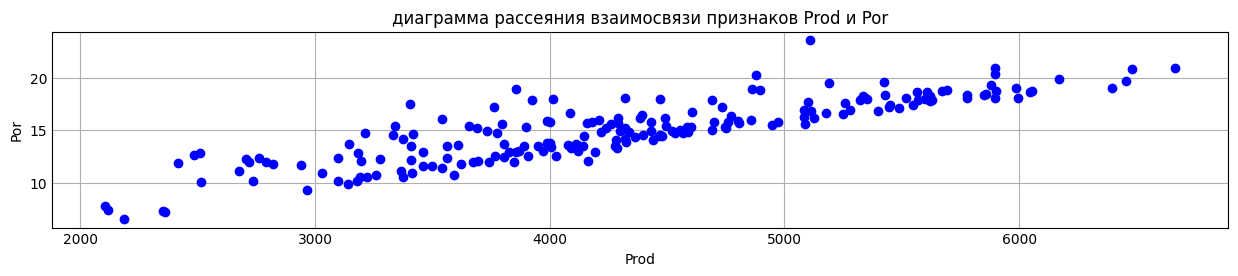

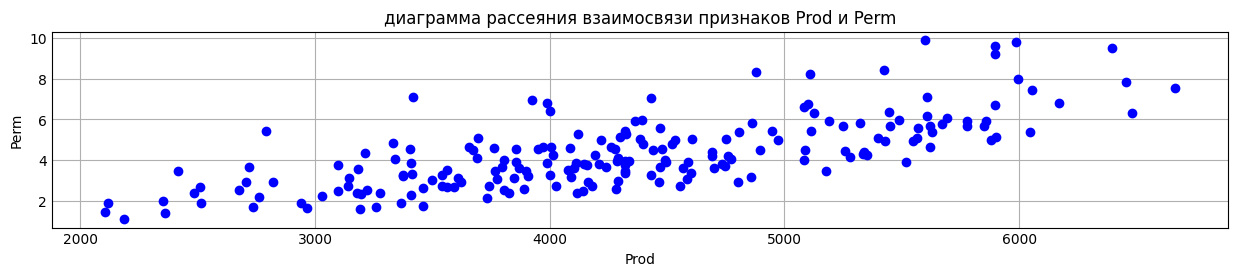

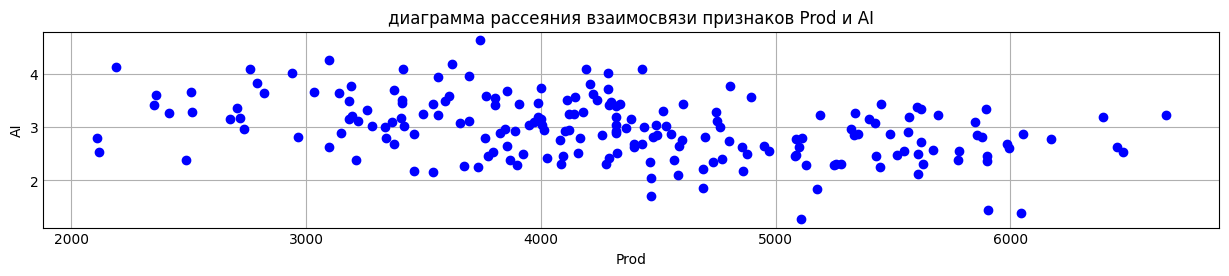

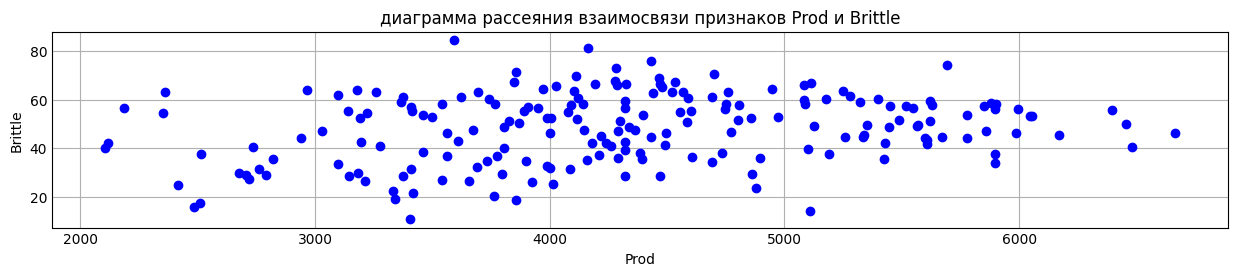

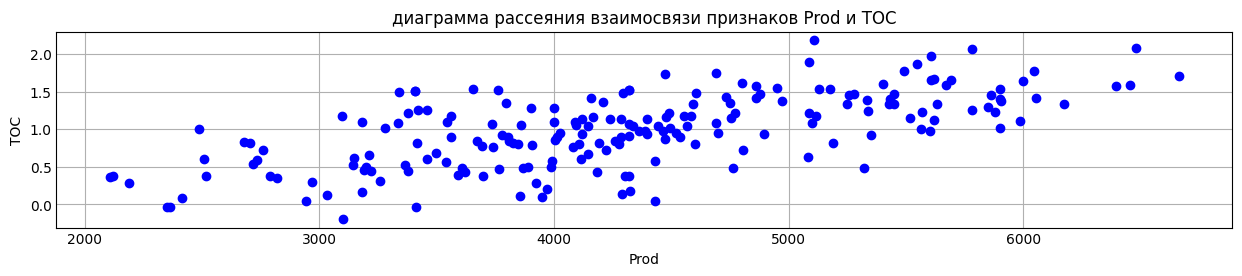

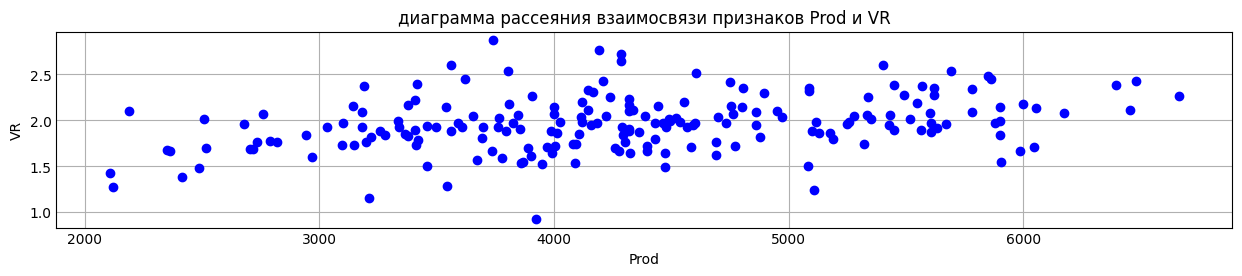

In [5]:
plt.style.use('_mpl-gallery')

for feature in data.columns.drop(['Prod']):
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.scatter(x=data['Prod'], y=data[feature], color = 'blue')
    ax.set(xlabel='Prod', ylabel=feature, title = f'диаграмма рассеяния взаимосвязи признаков Prod и {feature}')
    plt.show()

> * Выводы

> Пропущенных значений в датасете нет. Все данные представлены в числовом формате.

> Признак "Well" имеет большой разброс по сравнию с другими  признаками: порядок максимальных значений трех значный 200, а минимальный 1.

> Признак "Prod" имеет самые большой порядок величин среди все значений датасета - четырехзначный.

> Данные требую стандартизации.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

<Axes: >

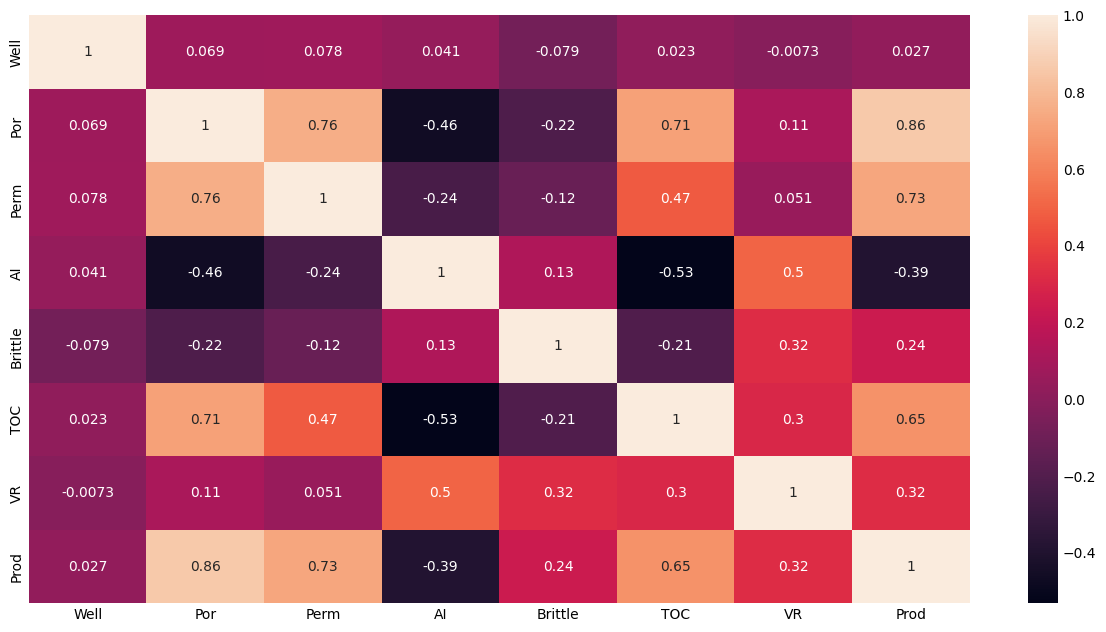

In [6]:
# Ваш код здесь
corr_data = data.corr()
fig = plt.figure(figsize=(12, 6))
sns.heatmap(corr_data, annot=True)

In [7]:
print(f'ранг корреляционной матрицы: {np.linalg.matrix_rank(corr_data)}')
print(f'определитель корреляционной матрицы: {np.linalg.det(corr_data):.5f}')

ранг корреляционной матрицы: 8
определитель корреляционной матрицы: 0.00073


> * Выводы

> Сильную корреляционную связь с целевым признаком Prod имеют признаки 'Por' - 0.86 и 'Perm' - 0.73. Слабую связь 'VR' - 0.32 Отсутствие связи или очень слабую связь - признаки 'Well' - 0.027 и 'Brittle' - 0.24

> Из контекста понятно, что признак 'Well' - идентификатор скважины - будет слабо влиять на целевую пременную.

> Хотя ранг матрицы равен числу признаков, судя по величине определителя близкой к нулю матрица плохо обусловлена.

> Признаки 'Por' и 'Perm' имеют сильную корреляционную связь между собой - 0.76, 'Por' - 'TOC' 0.71, что означает мультиколленеарность признаков в матрице.

> Результатам линейной регрессии построенным на матрице в неизменном виде доверять нельзя. Из-за высокой мультиколлинеарности коэффициенты регрессии теряют смысл, а их интерпретация становится невозможной.
Признаки 'Well', 'TOC' и 'Perm' требуется удалить.


### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [8]:
# Ваш код здесь
X = data.drop(['Prod'], axis = 1)
y = data['Prod']
lr = np.linalg.inv(X.T@X)@X.T@y
print(round(lr, 0))

0      -0.0
1     185.0
2     158.0
3    -676.0
4      20.0
5    -273.0
6    1125.0
dtype: float64


> *Выводы*

> Признак Well не информативен так как коэффициент при нем равен 0. Признак Brittle имеет малую корреляцию с целевым признаком по сравнению с остальными  признаками.

> Признаки Por, Perm, Brittle, VR имеют положительную корреляцию. Признаки AI, TOC - отрицательную.

> При увеличении признака Por (пористость скважины) на единицу %, производительность скважины Prod увеличивается примерно на 185 млн. кубических футов.

> При увеличении признака AI (акустический импеданс) на один $кг/м^2*10^6$ производительность скважины падает примерно на 676 млн. кубических футов.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [9]:
# Ваш код здесь
new = pd.DataFrame([{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }])
prod_new = lr@new.iloc[0].to_list()
print(f'Прогнозируемая производительность новой скважины {round(prod_new, 0)} млн. кубических футов')
e = 4748.315024 - prod_new
print(f'Абсолютная ошибка предсказанной выработки газа новой скважины {round(e, 0)} млн. кубических футов')

Прогнозируемая производительность новой скважины 4632.0 млн. кубических футов
Абсолютная ошибка предсказанной выработки газа новой скважины 117.0 млн. кубических футов


In [10]:
# расчитываем прогнозируемые производительности на всем датасете
E = pd.DataFrame(data['Prod'])
E['Prod_pred'] = X.apply(lambda row: row.to_numpy() @ lr, axis = 1)
# расчитываем абсолютные ошибки прогнозирования
E['Abs_error'] = E.apply(lambda row: row['Prod']-row['Prod_pred'], axis = 1)
E['Rel_error'] = E.apply(lambda row: abs((row['Prod']-row['Prod_pred'])/row['Prod']), axis = 1)
E['Sq_error'] = E.apply(lambda row: np.power(row['Prod']-row['Prod_pred'], 2), axis = 1)
display(E)
MAE = sum(abs(E['Abs_error'])) / E.shape[0]
display(f'Средняя абсолютная ошибка {round(MAE, 0)} млн. кубических футов')
MAPE = sum(E['Rel_error'])/ E.shape[0]
display(f'Средняя абсолютная процентная ошибка {round(MAPE * 100, 0)}%')
#MSE = sum(E['Sq_error']) / E.shape[0]
#display(f'Средняя квадратичная ошибка {round(MSE, 6)} кв. млн. кубических футов')

,Prod,Prod_pred,Abs_error,Rel_error,Sq_error
0,4165.196191,4669.090728,-503.894537,0.120977,253909.704415
1,3561.146205,3438.866789,122.279416,0.034337,14952.255605
2,4284.348574,4524.430981,-240.082407,0.056037,57639.562163
3,5098.680869,5145.359297,-46.678428,0.009155,2178.875617
4,3406.132832,3743.849682,-337.716850,0.099150,114052.671016
...,...,...,...,...,...
195,3847.571003,4094.248600,-246.677597,0.064113,60849.836725
196,5601.227131,5521.141047,80.086084,0.014298,6413.780812
197,3409.575363,3279.126178,130.449185,0.038260,17016.989944
198,5087.592149,5156.782624,-69.190475,0.013600,4787.321870


'Средняя абсолютная ошибка 171.0 млн. кубических футов'

'Средняя абсолютная процентная ошибка 4.0%'

> *Выводы*

> В качестве метрик модели выбраны MAE и MAPE, так как их  легче всего интерпретировать для заказачика в данной задаче регрессии.

> В среднем модель в предсказании производительности новой скважины ошибается на 171.352796 млн. кубических футов добываемого газа,
что составляет чуть меньше 4% от общего действительного объема добываемого газа.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [11]:
# Ваш код здесь
print(corr_data['Prod'])
print(round(lr, 0))

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64
0      -0.0
1     185.0
2     158.0
3    -676.0
4      20.0
5    -273.0
6    1125.0
dtype: float64


> * Выводы

> Признак 'TOC' в модели показал коэффициент 0.65, что говорит о прямой зависимости с целевым признаком, а коэффициент корреляции -273. С противоположным знаком, что говорит об обратной зависимости. Данное противоречие можно объяснить тем, что данные не приведены к единому масштабу, не стандартизированы, не удалены признаки сильно скоррелирвоанные между собой и слабоскоррелированые с целевым признаком.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [12]:
# Ваш код здесь
X_cleaned = X.drop(['Well', 'Perm', 'TOC'], axis = 1)
print(X_cleaned)
lr_cleaned = np.linalg.inv(X_cleaned.T @ X_cleaned) @ X_cleaned.T @ y
print(lr_cleaned)
E_cleaned = pd.DataFrame(data['Prod'])
E_cleaned['Prod_pred'] = X_cleaned.apply(lambda row: row.to_numpy() @ lr_cleaned, axis = 1)
# расчитываем абсолютные ошибки прогнозирования
E_cleaned['Abs_error'] = E_cleaned.apply(lambda row: row['Prod']-row['Prod_pred'], axis = 1)
E_cleaned['Rel_error'] = E_cleaned.apply(lambda row: abs((row['Prod']-row['Prod_pred'])/row['Prod']), axis = 1)
E_cleaned['Sq_error'] = E_cleaned.apply(lambda row: np.power(row['Prod']-row['Prod_pred'], 2), axis = 1)
display(E_cleaned)
MAE_cleaned = sum(abs(E_cleaned['Abs_error'])) / E_cleaned.shape[0]
display(f'Средняя абсолютная ошибка {round(MAE_cleaned, 0)} млн. кубических футов')
MAPE_cleaned = sum(E_cleaned['Rel_error'])/ E_cleaned.shape[0]
display(f'Средняя абсолютная процентная ошибка {round(MAPE_cleaned * 100, 0)}%')
#MSE_cleaned = sum(E_cleaned['Sq_error']) / E_cleaned.shape[0]
#display(f'Средняя квадратичная ошибка {round(MSE_cleaned, 6)} млн. кубических футов в кв.')

       Por    AI  Brittle    VR
0    12.08  2.80    81.40  2.31
1    12.38  3.22    46.17  1.88
2    14.02  4.01    72.80  2.72
3    17.67  2.63    39.81  1.88
4    17.52  3.18    10.94  1.90
..     ...   ...      ...   ...
195  11.95  2.97    67.18  2.06
196  17.99  3.38    44.32  2.08
197  12.12  3.52    57.07  1.73
198  15.55  2.48    58.25  2.35
199  20.89  3.23    46.17  2.27

[200 rows x 4 columns]
0    235.181367
1   -486.001397
2     22.192451
3    598.128444
dtype: float64


,Prod,Prod_pred,Abs_error,Rel_error,Sq_error
0,4165.196191,4668.329234,-503.133043,0.120795,253142.858743
1,3561.146205,3495.727769,65.418436,0.018370,4279.571815
2,4284.348574,4590.896976,-306.548402,0.071551,93971.922572
3,5098.680869,4885.434033,213.246836,0.041824,45474.213275
4,3406.132832,3954.122560,-547.989728,0.160883,300292.742334
...,...,...,...,...,...
195,3847.571003,4090.026651,-242.455648,0.063015,58784.741208
196,5601.227131,4815.904666,785.322465,0.140205,616731.374225
197,3409.575363,3440.958646,-31.383283,0.009204,984.910472
198,5087.592149,5150.098914,-62.506765,0.012286,3907.095714


'Средняя абсолютная ошибка 217.0 млн. кубических футов'

'Средняя абсолютная процентная ошибка 5.0%'

> * Выводы

> Модель линейной регрессии с очисткой от мультиколлиневрных признаков показало увеличение ошибок в метриках MAE и MAPE, по сравнению с моделью без очистки. Однако противоречие коэффициентов линейной регрессии и коэффициентов корреляции удалось побороть.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [13]:
# Ваш код здесь
lr_sk = LinearRegression(fit_intercept=False)
lr_sk.fit(X_cleaned, y)
print(lr_sk.coef_)
y_pred = lr_sk.predict(X_cleaned)
print(f'Средняя абсолютная ошибка {round(metrics.mean_absolute_error(y, y_pred), 0)} млн. кубических футов')
print(f'Средняя абсолютная процентная ошибка {round(metrics.mean_absolute_percentage_error(y, y_pred) * 100, 0)}%')
#print(f'Средняя квадратичная ошибка {round(metrics.mean_squared_error(y, y_pred), 0)} млн. кубических футов в кв.')


[ 235.18136665 -486.00139708   22.19245125  598.12844353]
Средняя абсолютная ошибка 217.0 млн. кубических футов
Средняя абсолютная процентная ошибка 5.0%


> * Выводы

> Расчеты при помощи модуля LinearRegression библиотеки sklearn показали одинаковые результаты с расчетами по аналитической формуле.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [92]:
# Ваш код здесь
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X_cleaned)
display(pd.DataFrame(X_scaled, columns=list(X_cleaned.columns)))
poly = PolynomialFeatures(degree=3, include_bias=False)
X_scaled_poly=poly.fit_transform(X_scaled)
print(f'количество полиноминальных признаков {X_scaled_poly.shape[1]}')
lr_poly = LinearRegression(fit_intercept=False)
# оцениваем качество модели на кросс-валидации
cv_results_mae = cross_validate(lr_poly, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae['test_score'].mean()))
cv_results_mape = cross_validate(lr_poly, X_scaled_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_mape['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_mape['test_score'].mean() * 100))

,Por,AI,Brittle,VR
0,-0.982256,-0.298603,2.358297,1.152048
1,-0.881032,0.444147,-0.141332,-0.280931
2,-0.327677,1.841224,1.748113,2.518377
3,0.903875,-0.599240,-0.592585,-0.280931
4,0.853263,0.373409,-2.640962,-0.214280
...,...,...,...,...
195,-1.026119,0.002034,1.349364,0.318921
196,1.011847,0.727099,-0.272593,0.385571
197,-0.968759,0.974682,0.632042,-0.780807
198,0.188562,-0.864508,0.715765,1.285349


количество полиноминальных признаков 34
MAE на тренировочных фолдах: 1737.69
MAE на валидационных фолдах: 2565.90
MAPE на тренировочных фолдах: 41.85 %
MAPE на валидационных фолдах: 62.35 %


> * Выводы

> Полиноминальная регрессия показала высокие показатели ошибки MAE и MAPE, что говорит о низкой пресказательной способности модели.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
# Ваш код здесь
param_grid_lasso = {'alpha': list(np.arange(0, 100, 0.1))}

grid_search_lasso = GridSearchCV(
    estimator=Lasso(max_iter=10000, fit_intercept = False, random_state=42), 
    param_grid=param_grid_lasso, 
    cv=5,
    n_jobs = -1
)

%time grid_search_lasso.fit(X_scaled_poly, y) 
y_pred_lasso = grid_search_lasso.predict(X_scaled_poly)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_lasso.best_params_))
alpha = grid_search_lasso.best_params_['alpha']


CPU times: total: 1.39 s
Wall time: 19.6 s
Наилучшие значения гиперпараметров: {'alpha': 76.10000000000001}


In [119]:
lasso = Lasso(alpha = alpha, max_iter=10000, fit_intercept = False, random_state=42)
cv_results_mae_lasso = cross_validate(lasso, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae_lasso['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae_lasso['test_score'].mean()))
cv_results_mape_lasso = cross_validate(lasso, X_scaled_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_mape_lasso['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_mape_lasso['test_score'].mean() * 100))

MAE на тренировочных фолдах: 1918.96
MAE на валидационных фолдах: 2349.48
MAPE на тренировочных фолдах: 45.54 %
MAPE на валидационных фолдах: 56.62 %


> * Выводы

> Полиноминальная регрессия третьей степени с регуляризацией типа Lasso показала высокие показатели ошибки MAE и MAPE, что говорит о низкой пресказательной способности модели.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [121]:
# Ваш код здесь
param_grid_ridge = {'alpha': list(np.arange(0, 200, 0.1))}

grid_search_ridge = GridSearchCV(
    estimator=Ridge(max_iter=10000, fit_intercept = False, random_state=42), 
    param_grid=param_grid_ridge, 
    cv=5,
    n_jobs = -1
)

%time grid_search_ridge.fit(X_scaled_poly, y) 
y_pred_ridge = grid_search_ridge.predict(X_scaled_poly)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_ridge.best_params_))
alpha_ridge = grid_search_ridge.best_params_['alpha']

CPU times: total: 1.89 s
Wall time: 2.48 s
Наилучшие значения гиперпараметров: {'alpha': 141.70000000000002}


In [122]:
ridge = Ridge(alpha = alpha_ridge, max_iter=10000, fit_intercept = False, random_state=42)
cv_results_mae_ridge = cross_validate(ridge, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae_ridge['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae_ridge['test_score'].mean()))
cv_results_mape_ridge = cross_validate(ridge, X_scaled_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_mape_ridge['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_mape_ridge['test_score'].mean() * 100))

MAE на тренировочных фолдах: 2239.44
MAE на валидационных фолдах: 2476.69
MAPE на тренировочных фолдах: 52.07 %
MAPE на валидационных фолдах: 58.02 %


> * Выводы 

> Полиноминальная регрессия  третьей степени с регуляризацией типа Ridge показала высокие показатели ошибки MAE и MAPE, что говорит о низкой пресказательной способности модели.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [124]:
# Ваш код здесь
param_grid_en = {'alpha': list(np.arange(0, 10, 0.1)), 'l1_ratio': list(np.arange(0, 1, 0.1))}

grid_search_en = GridSearchCV(
    estimator=ElasticNet(max_iter=10000, fit_intercept = False, random_state=42), 
    param_grid=param_grid_en, 
    cv=5,
    n_jobs = -1
)

%time grid_search_en.fit(X_scaled_poly, y) 
y_pred_en = grid_search_en.predict(X_scaled_poly)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_en.best_params_))
alpha_en = grid_search_en.best_params_['alpha']
l1 = grid_search_en.best_params_['l1_ratio']

CPU times: total: 1.05 s
Wall time: 3.3 s
Наилучшие значения гиперпараметров: {'alpha': 8.200000000000001, 'l1_ratio': 0.9}


In [125]:
elasticnet = ElasticNet(alpha = alpha_en, l1_ratio = l1, max_iter=10000, fit_intercept = False, random_state=42)
cv_results_mae_en = cross_validate(elasticnet, X_scaled_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae_en['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae_en['test_score'].mean()))
cv_results_mape_en = cross_validate(elasticnet, X_scaled_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_mape_en['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_mape_en['test_score'].mean() * 100))

MAE на тренировочных фолдах: 2225.53
MAE на валидационных фолдах: 2465.18
MAPE на тренировочных фолдах: 51.78 %
MAPE на валидационных фолдах: 57.80 %


> * Выводы

> Полиноминальная регрессия третьей степени с регуляризацией типа Lasso показала высокие показатели ошибки MAE и MAPE, что говорит о низкой пресказательной способности модели.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [134]:
# Ваш код здесь
final = pd.DataFrame({'Модель':['lr', 'lr_cleaned', 'lr_poly', 'poly_lasso', 'poly_ridge','poly_ElasticNet'],
                      'Гиперпараметры':['-', '-', '-', grid_search_lasso.best_params_, grid_search_ridge.best_params_, grid_search_en.best_params_],
                      'Полиноминальные признаки': ['Нет', 'Нет', 'Да', 'Да', 'Да', 'Да'],
                      'MAE train': ['-', '-', -cv_results_mae['train_score'].mean(), -cv_results_mae_lasso['train_score'].mean(), -cv_results_mae_ridge['train_score'].mean(), -cv_results_mae_en['train_score'].mean()],
                      'MAE test': [MAE, MAE_cleaned, -cv_results_mae['test_score'].mean(), -cv_results_mae_lasso['test_score'].mean(), -cv_results_mae_ridge['test_score'].mean(), -cv_results_mae_en['test_score'].mean()],
                      'MAPE train': ['-', '-', -cv_results_mape['train_score'].mean()*100, -cv_results_mape_lasso['train_score'].mean()*100, -cv_results_mape_ridge['train_score'].mean()*100, -cv_results_mape_en['train_score'].mean()*100],
                      'MAPE test': [MAPE * 100, MAPE_cleaned * 100, -cv_results_mape['test_score'].mean()*100, -cv_results_mape_lasso['test_score'].mean()*100, -cv_results_mape_ridge['test_score'].mean()*100, -cv_results_mape_en['test_score'].mean()*100]
                      })
print('Сводная таблица результатов подбора модели линейной регрессии')
display(final)

Сводная таблица результатов подбора модели линейной регрессии


,Модель,Гиперпараметры,Полиноминальные признаки,MAE train,MAE test,MAPE train,MAPE test
0,lr,-,Нет,-,171.352796,-,3.982811
1,lr_cleaned,-,Нет,-,216.938872,-,5.025351
2,lr_poly,-,Да,1737.689467,2565.898613,41.848269,62.351495
3,poly_lasso,{'alpha': 76.10000000000001},Да,1918.957573,2349.478538,45.53864,56.622588
4,poly_ridge,{'alpha': 141.70000000000002},Да,2239.43835,2476.693793,52.070782,58.019440
5,poly_ElasticNet,"{'alpha': 8.200000000000001, 'l1_ratio': 0.9}",Да,2225.531385,2465.178273,51.779113,57.804345


> * Выводы

> Простая модель линейной регрессии показала наилучшие результаты по сравнению с моделью полиноминайльной регрессии 3-го порядка. Регуляризации L1, L2, а также их комбинация ElasticNet не улучшили результаты.